In [ ]:
#| code-summary: Load Packages
#| code-fold: true

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [ ]:
#| echo: false
from IPython.display import display
pd.options.display.notebook_repr_html = False

In [ ]:
#| code-summary: Options
#| code-fold: true

# pandas options
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

![](images/process.png){width=500 fig-align="center"} <br />
source: [R for Data Science](https://r4ds.had.co.nz/explore-intro.html)

Visualising, transforming, modelling을 통해 **질문들을 개선하거나 새로운 질문들을 생성**하면서 데이터에 대한 이해를 늘리면서 질문들에 답을 구하는 반복순환 과정

크게 다음 2가지 타입의 질문을 기본으로 시작

1. 각 변수들 내에 **변동성 (variation)**은 어떠한가?
2. 두 변수들간에 **공변성 (covariation)**은 어떠한가?

In [ ]:
# import a dataset
diamonds_data = sm.datasets.get_rdataset("diamonds", "ggplot2")
diamonds = diamonds_data.data

In [ ]:
#| output: false
print(diamonds_data.__doc__)

.. container::

   ======== ===============
   diamonds R Documentation
   ======== ===============

   .. rubric:: Prices of over 50,000 round cut diamonds
      :name: prices-of-over-50000-round-cut-diamonds

   .. rubric:: Description
      :name: description

   A dataset containing the prices and other attributes of almost 54,000
   diamonds. The variables are as follows:

   .. rubric:: Usage
      :name: usage

   ::

      diamonds

   .. rubric:: Format
      :name: format

   A data frame with 53940 rows and 10 variables:

   price
      price in US dollars ($326–$18,823)

   carat
      weight of the diamond (0.2–5.01)

   cut
      quality of the cut (Fair, Good, Very Good, Premium, Ideal)

   color
      diamond colour, from D (best) to J (worst)

   clarity
      a measurement of how clear the diamond is (I1 (worst), SI2, SI1,
      VS2, VS1, VVS2, VVS1, IF (best))

   x
      length in mm (0–10.74)

   y
      width in mm (0–58.9)

   z
      depth in mm (0–31.8)

   dep

In [ ]:
diamonds

       carat        cut color clarity  depth  table  price    x    y    z
0       0.23      Ideal     E     SI2  61.50  55.00    326 3.95 3.98 2.43
1       0.21    Premium     E     SI1  59.80  61.00    326 3.89 3.84 2.31
2       0.23       Good     E     VS1  56.90  65.00    327 4.05 4.07 2.31
...      ...        ...   ...     ...    ...    ...    ...  ...  ...  ...
53937   0.70  Very Good     D     SI1  62.80  60.00   2757 5.66 5.68 3.56
53938   0.86    Premium     H     SI2  61.00  58.00   2757 6.15 6.12 3.74
53939   0.75      Ideal     D     SI2  62.20  55.00   2757 5.83 5.87 3.64

[53940 rows x 10 columns]

## Variation (변동성, 변량)

variability, variance..

- 대상들을 측정함 따라 값이 변화하는 경향성
    - 사람들의 키, 눈의 색깔 등
- 변수는 고유한 변동성의 패턴을 지님
- 변수의 값들의 분포를 봄으로써 그 패턴을 파악하고 질문들을 던질 수 있음
    - 어떤 값들이 가장 흔하게 나오며, 왜 그런가?
    - 어떤 값들이 가장 드물며, 왜 그런가?
    - 어떤 특이한 패턴들이 있다면, 왜 그런가?





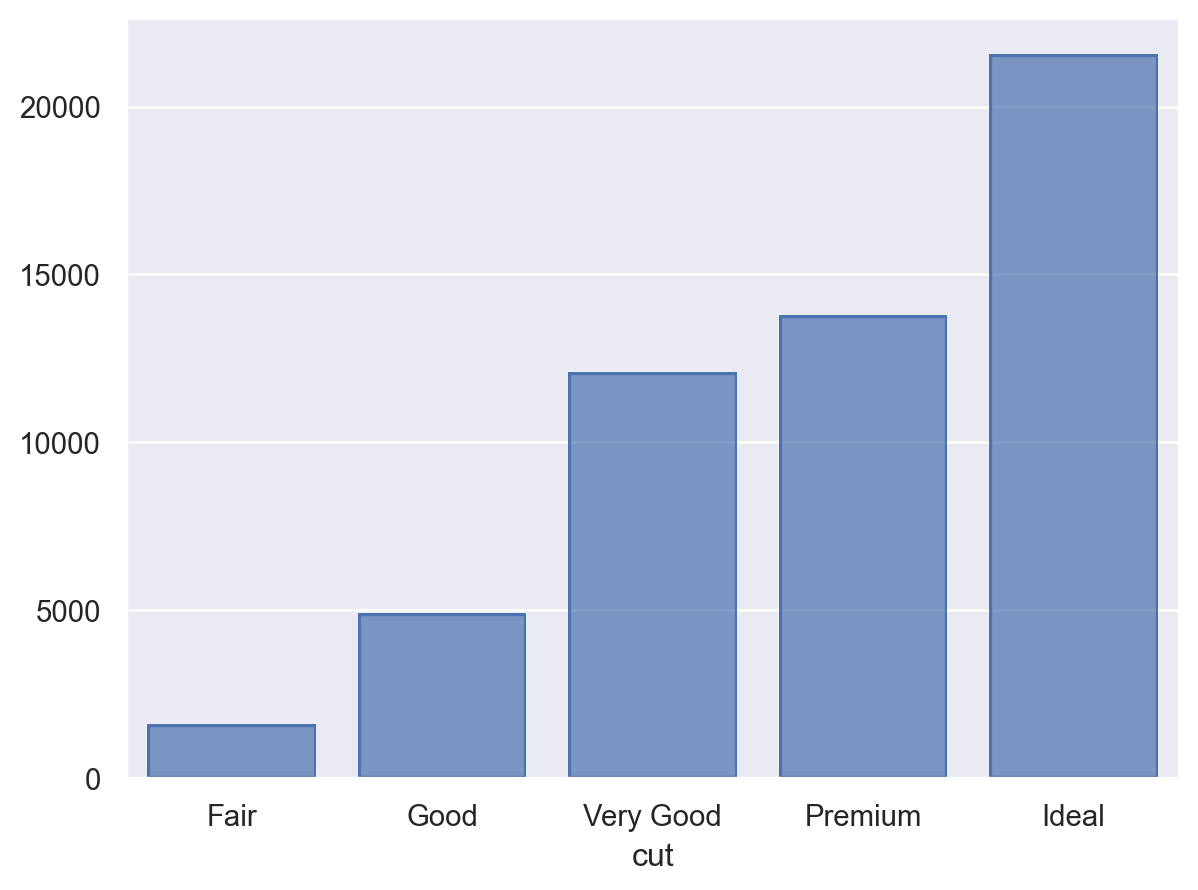

In [ ]:
so.Plot(diamonds, x="cut").add(so.Bar(), so.Count())

In [ ]:
#| output: false
so.Plot(diamonds, x="cut").add(so.Bar(), so.Count())

diamonds.value_counts("cut", sort=False)

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

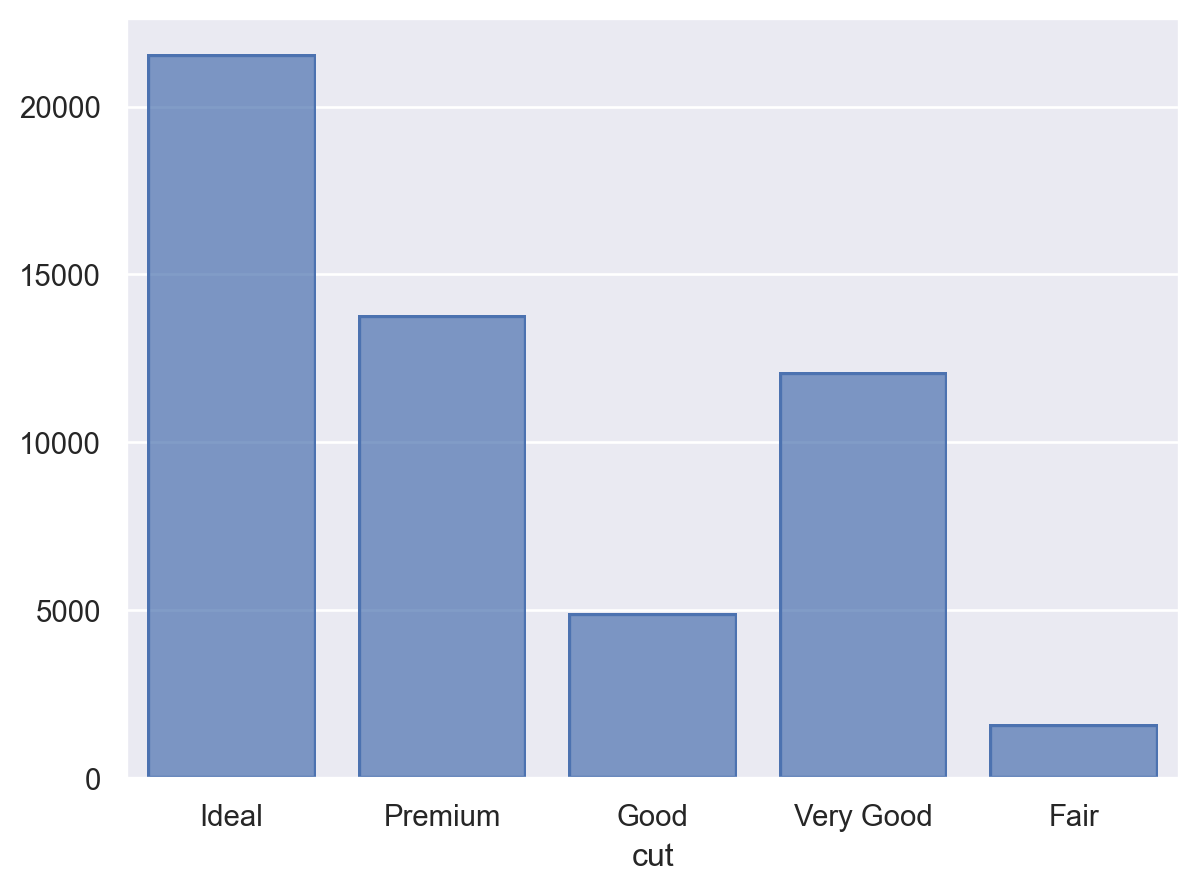

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

In [ ]:
#| layout-ncol: 2
#| echo: false
p = (
    so.Plot(diamonds, x="cut")
    .add(so.Bar(), so.Count())
)
display(p)
display(diamonds.value_counts("cut", sort=False))

### A categorical data type

- 일종의 데이터 압축 기술이며, 몇 개의 levels로만 이루어진 큰 데이터의 경우 메모리 절약
- 순서가 부여되어, sorting을 하거나 min/max 함수가 알파벳 순서가 아닌 부여된 순서를 적용
- 다른 Python library들 중에는 이 순서를 활용하는 것이 있음; 통계적 분석이나 플랏을 그릴 때
  
[McKinney's/Categorical data](https://wesmckinney.com/book/data-cleaning.html#pandas-categorical)
[pandas/Categorical data](https://pandas.pydata.org/docs/user_guide/categorical.html)

In [ ]:
pd.Categorical(diamonds["cut"])

['Ideal', 'Premium', 'Good', 'Premium', 'Good', ..., 'Ideal', 'Good', 'Very Good', 'Premium', 'Ideal']
Length: 53940
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [ ]:
diamonds["cut"] = pd.Categorical(
    diamonds["cut"], 
    categories=["Fair", "Good", "Very Good", "Premium", "Ideal"],
    ordered=True
)

In [ ]:
diamonds.value_counts("cut", sort=False)

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
dtype: int64

In [ ]:
diamonds.value_counts("cut", sort=False).index

CategoricalIndex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=False, dtype='category', name='cut')

In [ ]:
diamonds.groupby("cut")["price"].mean()

cut
Fair        4358.76
Good        3928.86
Very Good   3981.76
Premium     4584.26
Ideal       3457.54
Name: price, dtype: float64

In [ ]:
# cut, color, clarity 모두 categorical type으로 변형
diamonds["color"] = pd.Categorical(
    diamonds["color"], 
    categories=["D", "E", "F", "G", "H", "I", "J"],
    ordered=True
)
diamonds["clarity"] = pd.Categorical(
    diamonds["clarity"], 
    categories=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],
    ordered=True
)

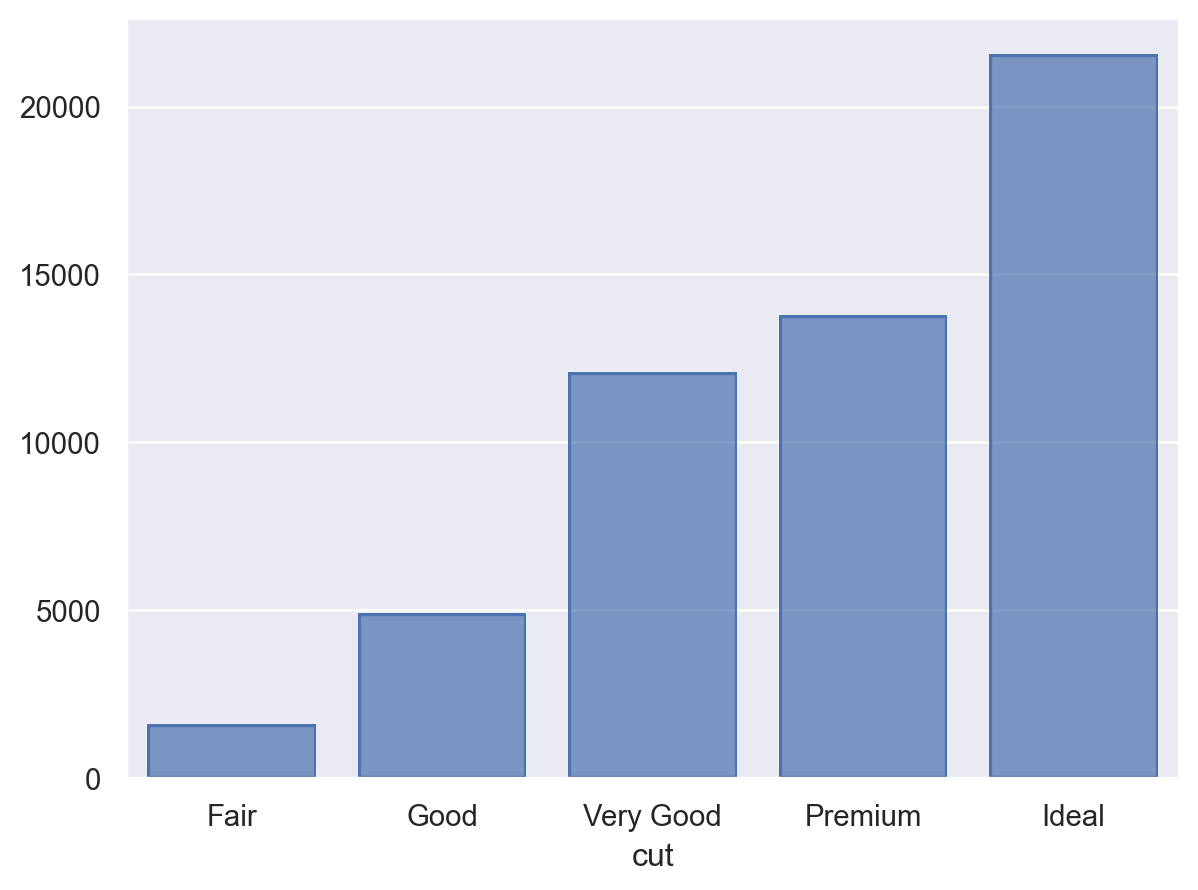

In [ ]:
so.Plot(diamonds, x="cut").add(so.Bar(), so.Count())

### Discretize/Bining
`pd.cut()`, `pd.qcut()`

In [ ]:
(
    diamonds.assign(carat_cat = lambda x: pd.cut(x.carat, 10))
    .value_counts("carat_cat")
)

carat_cat
(0.195, 0.681]    25155
(0.681, 1.162]    18626
(1.162, 1.643]     7129
                  ...  
(3.567, 4.048]        5
(4.048, 4.529]        2
(4.529, 5.01]         1
Length: 10, dtype: int64

::: {.callout-note}
```python
carat_cat = pd.cut(diamonds["carat"], 3)
carat_cat.dtype
# CategoricalDtype(categories=[(0.195, 1.803], (1.803, 3.407], (3.407, 5.01]], ordered=True)

carat_cat.cat.categories
# IntervalIndex([(0.195, 1.803], (1.803, 3.407], (3.407, 5.01]], dtype='interval[float64, right]')
```
:::